In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from abc import abstractmethod
import scipy as sc
from ydata_profiling import ProfileReport
from scipy import stats as sts
import sklearn 
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, fbeta_score, precision_recall_curve, average_precision_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import phik
from typing import Literal
from sklearn.compose import ColumnTransformer
import umap
from catboost import CatBoostClassifier
import optuna
from sklearn.pipeline import Pipeline

pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
df = pd.read_csv('data/star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [4]:
df = df.drop(columns='obj_ID')

In [5]:
df

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [59]:
df = df.iloc[range(1000)]

In [20]:
df['rerun_ID'].unique()

array([301])

In [22]:
df = df.drop(columns='rerun_ID')

In [6]:
df.describe()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
df.isna().sum()

alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
df.dtypes

alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [9]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [10]:
profile = ProfileReport(df)
profile.to_file('stellar_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 49.74it/s]


In [18]:
df[df['z'] == -9999]

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


In [16]:
df[df['u'] == -9999]

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


In [15]:
df = df.drop(index=79543)

In [30]:
ord = OrdinalEncoder()

df[['class']] = ord.fit_transform(df[['class']])

In [60]:
X = df.drop(columns='class')
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
def create_pipeline_xgboost(xgb_params):
    
    pipeline = Pipeline([
        ('power_transform', PowerTransoformer()),
        ('model', OneVsRestClassifier(XGBClassifier()))
    ])
    
    return pipeline 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import optuna

def objective(trial):

    scaler = PowerTransformer()
        
    model = trial.suggest_categorical('model', ['xgb', 'catboost', 'RandomForest'])
    
    if model == 'xgb':
        model = OneVsRestClassifier(XGBClassifier(
            n_estimators = 300,
            learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3),
            max_depth = trial.suggest_int('max_depth', 1, 10),
            reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4),
            reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        ))
        
    elif model == 'catboost':
        model = OneVsRestClassifier(CatBoostClassifier(verbose=0))
    else:
        model = OneVsRestClassifier(RandomForestClassifier(
            criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            max_depth = trial.suggest_int('max_depth', 1, 30),
            min_samples_split = trial.suggest_int('min_samples_split', 2, 15),
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20),
            min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf', 0.00001, 0.5),
            max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 3, 200),
            n_estimators = trial.suggest_int('n_estimators', 2, 1000),
            bootstrap = trial.suggest_categorical('bootstrap', [True, False])
        ))
        
    pipeline = Pipeline([
        ("scaler", scaler),
        ("model", model)
    ])
    
    # Получаем предсказания для каждой модели через кросс-валидацию
    y_pred_prob = cross_val_predict(pipeline, X_train, y_train, cv=3, method='predict_proba')

    # Рисуем ROC-кривую для каждой модели
    n_classes = y_train.nunique()  # Получаем количество классов
    fpr_dict = {}
    tpr_dict = {}
    roc_auc_dict = {}
    
    for i in range(n_classes):
        # Вычисляем fpr и tpr для каждого класса
        fpr, tpr, _ = roc_curve(y_train == i, y_pred_prob[:, i])  # Для бинарной классификации
        roc_auc = auc(fpr, tpr)
        
        # Сохраняем ROC-значения для каждой модели
        fpr_dict[i] = fpr
        tpr_dict[i] = tpr
        roc_auc_dict[i] = roc_auc
        
        # Рисуем ROC-кривую для каждого класса
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
    # Усредненная ROC-кривая
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)
    
    for i in range(n_classes):
        mean_tpr += np.interp(mean_fpr, fpr_dict[i], tpr_dict[i])
    
    mean_tpr /= n_classes
    
    # Рисуем усредненную ROC-кривую
    plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--', lw=2, label='Mean ROC')

    # Добавляем диагональ (случайная классификация)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

    # Добавляем заголовки и подписи
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Model and Mean ROC Curve')
    plt.legend(loc='lower right')

    # Показать график
    plt.show()

    # Оценка модели с использованием ROC AUC
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="roc_auc_ovr").mean()
    return score

# Создание и оптимизация исследования
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Лучший результат
print("Best pipeline:", study.best_params)


In [ ]:
def objective(trial):

    scaler = PowerTransformer()
        
    model = trial.suggest_categorical('model', ['xgb', 'catboost', 'RandomForest'])
    
    if model == 'xgb':
        model = OneVsRestClassifier(XGBClassifier(
            n_estimators = 300,
            learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3),
            max_depth = trial.suggest_int('max_depth', 1, 10),
            reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4),
            reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        ))
        
    elif model == 'catboost':
        model = OneVsRestClassifier(CatBoostClassifier(verbose=0))
        
    else:
        model = OneVsRestClassifier(RandomForestClassifier(
            criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            max_depth = trial.suggest_int('max_depth', 1, 30),
            min_samples_split = trial.suggest_int('min_samples_split', 2, 15),
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20),
            min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf', 0.00001, 0.5),
            max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 3, 200),
            n_estimators = trial.suggest_int('n_estimators', 2, 1000),
            bootstrap = trial.suggest_categorical('bootstrap', [True, False])
        ))
        
    pipeline = Pipeline([
        ("scaler", scaler),
        ("model", model)
    ])
    
    # Получаем предсказания для каждой модели через кросс-валидацию
    y_pred_prob = cross_val_predict(pipeline, X_train, y_train, cv=3, method='predict_proba')

    # Рисуем ROC-кривую для каждой модели
    n_classes = y_train.nunique()  # Получаем количество классов
    fpr_dict = {}
    tpr_dict = {}
    roc_auc_dict = {}
    
    for i in range(n_classes):
        # Вычисляем fpr и tpr для каждого класса
        fpr, tpr, _ = roc_curve(y_train == i, y_pred_prob[:, i])  # Для бинарной классификации
        roc_auc = auc(fpr, tpr)
        
        # Сохраняем ROC-значения для каждой модели
        fpr_dict[i] = fpr
        tpr_dict[i] = tpr
        roc_auc_dict[i] = roc_auc
        
        # Рисуем ROC-кривую для каждого класса
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
    # Усредненная ROC-кривая
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)
    
    for i in range(n_classes):
        mean_tpr += np.interp(mean_fpr, fpr_dict[i], tpr_dict[i])
    
    mean_tpr /= n_classes
    
    # Рисуем усредненную ROC-кривую
    plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--', lw=2, label='Mean ROC')

    # Добавляем диагональ (случайная классификация)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

    # Добавляем заголовки и подписи
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Model and Mean ROC Curve')
    plt.legend(loc='lower right')

    # Показать график
    plt.show()

    # Оценка модели с использованием ROC AUC
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="roc_auc_ovr").mean()
    return score

# Создание и оптимизация исследования
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Лучший результат
print("Best pipeline:", study.best_params)

In [71]:
study.best_value

0.9892221808249014

In [118]:
cb = CatBoostClassifier(verbose=0)
cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
n = y_train.nunique()
fbeta = fbeta_score(y_test, y_pred, beta=0.1, average='weighted')
y_pred_prob = cross_val_predict(cb, X_train, y_train, cv=3, method='predict_proba')

In [119]:
y_pred_prob = y_pred_prob.round(3)

In [120]:
cross_val_score(cb, X_train, y_train, cv=3, scoring="roc_auc_ovr")
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

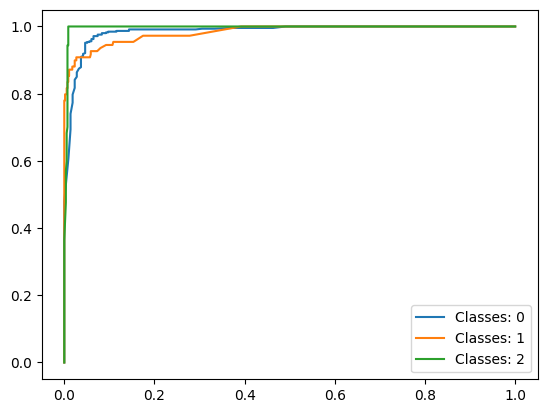

In [124]:
for i in range(n):
        
        fpr, tpr, _ = roc_curve(y_train == i, y_pred_prob[:, i]) 
        roc_auc = auc(fpr, tpr)
        
        fpr_dict[i] = fpr
        tpr_dict[i] = tpr
        roc_auc_dict[i] = roc_auc
        plt.plot(fpr, tpr, label=f'Classes: {i}')
        plt.legend()